In [7]:
%matplotlib notebook
from fuvpy_simon.Viewer import Visualise
import matplotlib.pyplot as plt
from polplot_simon.polplot import Polarplot as polar
import numpy as np

<IPython.core.display.Javascript object>


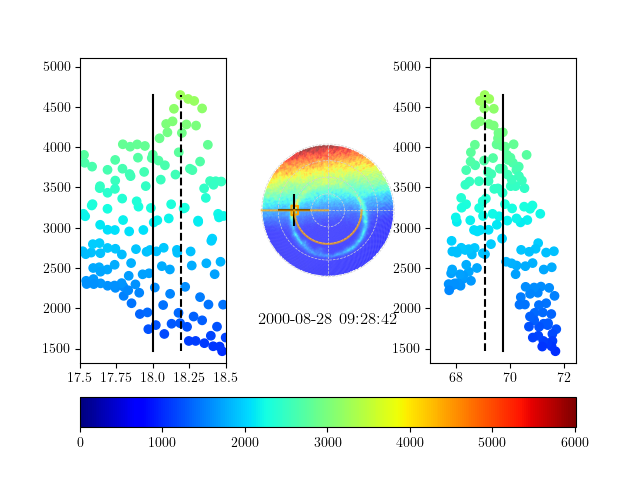

In [8]:
fig=plt.figure()
gs= fig.add_gridspec(2, 3, height_ratios=[1, .1])
MLTax= fig.add_subplot(gs[0, 0])
MLATax=fig.add_subplot(gs[0, 2])
ax=polar(fig.add_subplot(gs[0, 1]))
cax=fig.add_subplot(gs[1, :])

In [9]:
file= '../data/wicFiles/wic20002410928.idl'
vis= Visualise(fig, ax, cax, MLTax, MLATax)

In [11]:
vis.show_image(file, ax)

(<matplotlib.collections.PolyCollection at 0x7f756bd0fee0>,
 <matplotlib.colorbar.Colorbar at 0x7f756a807c40>)